## Assignment Week 10 Problem One

### Import modules for this problem.

In [1]:
import arcpy, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

### Creating a list of the raster images from its folder.

In [2]:
path = 'D:/GIS 5091/Week 10/CHIRP/'

file_list = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
print(file_list)

['CHIRP.2017.01.1.tif', 'CHIRP.2017.01.2.tif', 'CHIRP.2017.01.3.tif', 'CHIRP.2017.02.1.tif', 'CHIRP.2017.02.2.tif', 'CHIRP.2017.02.3.tif', 'CHIRP.2017.03.1.tif', 'CHIRP.2017.03.2.tif', 'CHIRP.2017.03.3.tif', 'CHIRP.2017.04.1.tif', 'CHIRP.2017.04.2.tif', 'CHIRP.2017.04.3.tif', 'CHIRP.2017.05.1.tif', 'CHIRP.2017.05.2.tif', 'CHIRP.2017.05.3.tif', 'CHIRP.2017.06.1.tif', 'CHIRP.2017.06.2.tif', 'CHIRP.2017.06.3.tif', 'CHIRP.2017.07.1.tif', 'CHIRP.2017.07.2.tif', 'CHIRP.2017.07.3.tif', 'CHIRP.2017.08.1.tif', 'CHIRP.2017.08.2.tif', 'CHIRP.2017.08.3.tif', 'CHIRP.2017.09.1.tif', 'CHIRP.2017.09.2.tif', 'CHIRP.2017.09.3.tif', 'CHIRP.2017.10.1.tif', 'CHIRP.2017.10.2.tif', 'CHIRP.2017.10.3.tif', 'CHIRP.2017.11.1.tif', 'CHIRP.2017.11.2.tif', 'CHIRP.2017.11.3.tif', 'CHIRP.2017.12.1.tif', 'CHIRP.2017.12.2.tif', 'CHIRP.2017.12.3.tif']


### Iterate through each raster image in the list and read into a NumPy array.

In [3]:
ras_list = []
for ras in file_list:
    filepath = path + ras
    arr = arcpy.RasterToNumPyArray(filepath, nodata_to_value=0)
    ras_list.append(arr)

### Stack the 36 raster images.

In [4]:
ras_stack = np.stack(ras_list)
print(ras_stack.shape)

(36, 2000, 7200)


### Plotting a few slices to see rainfall over time.

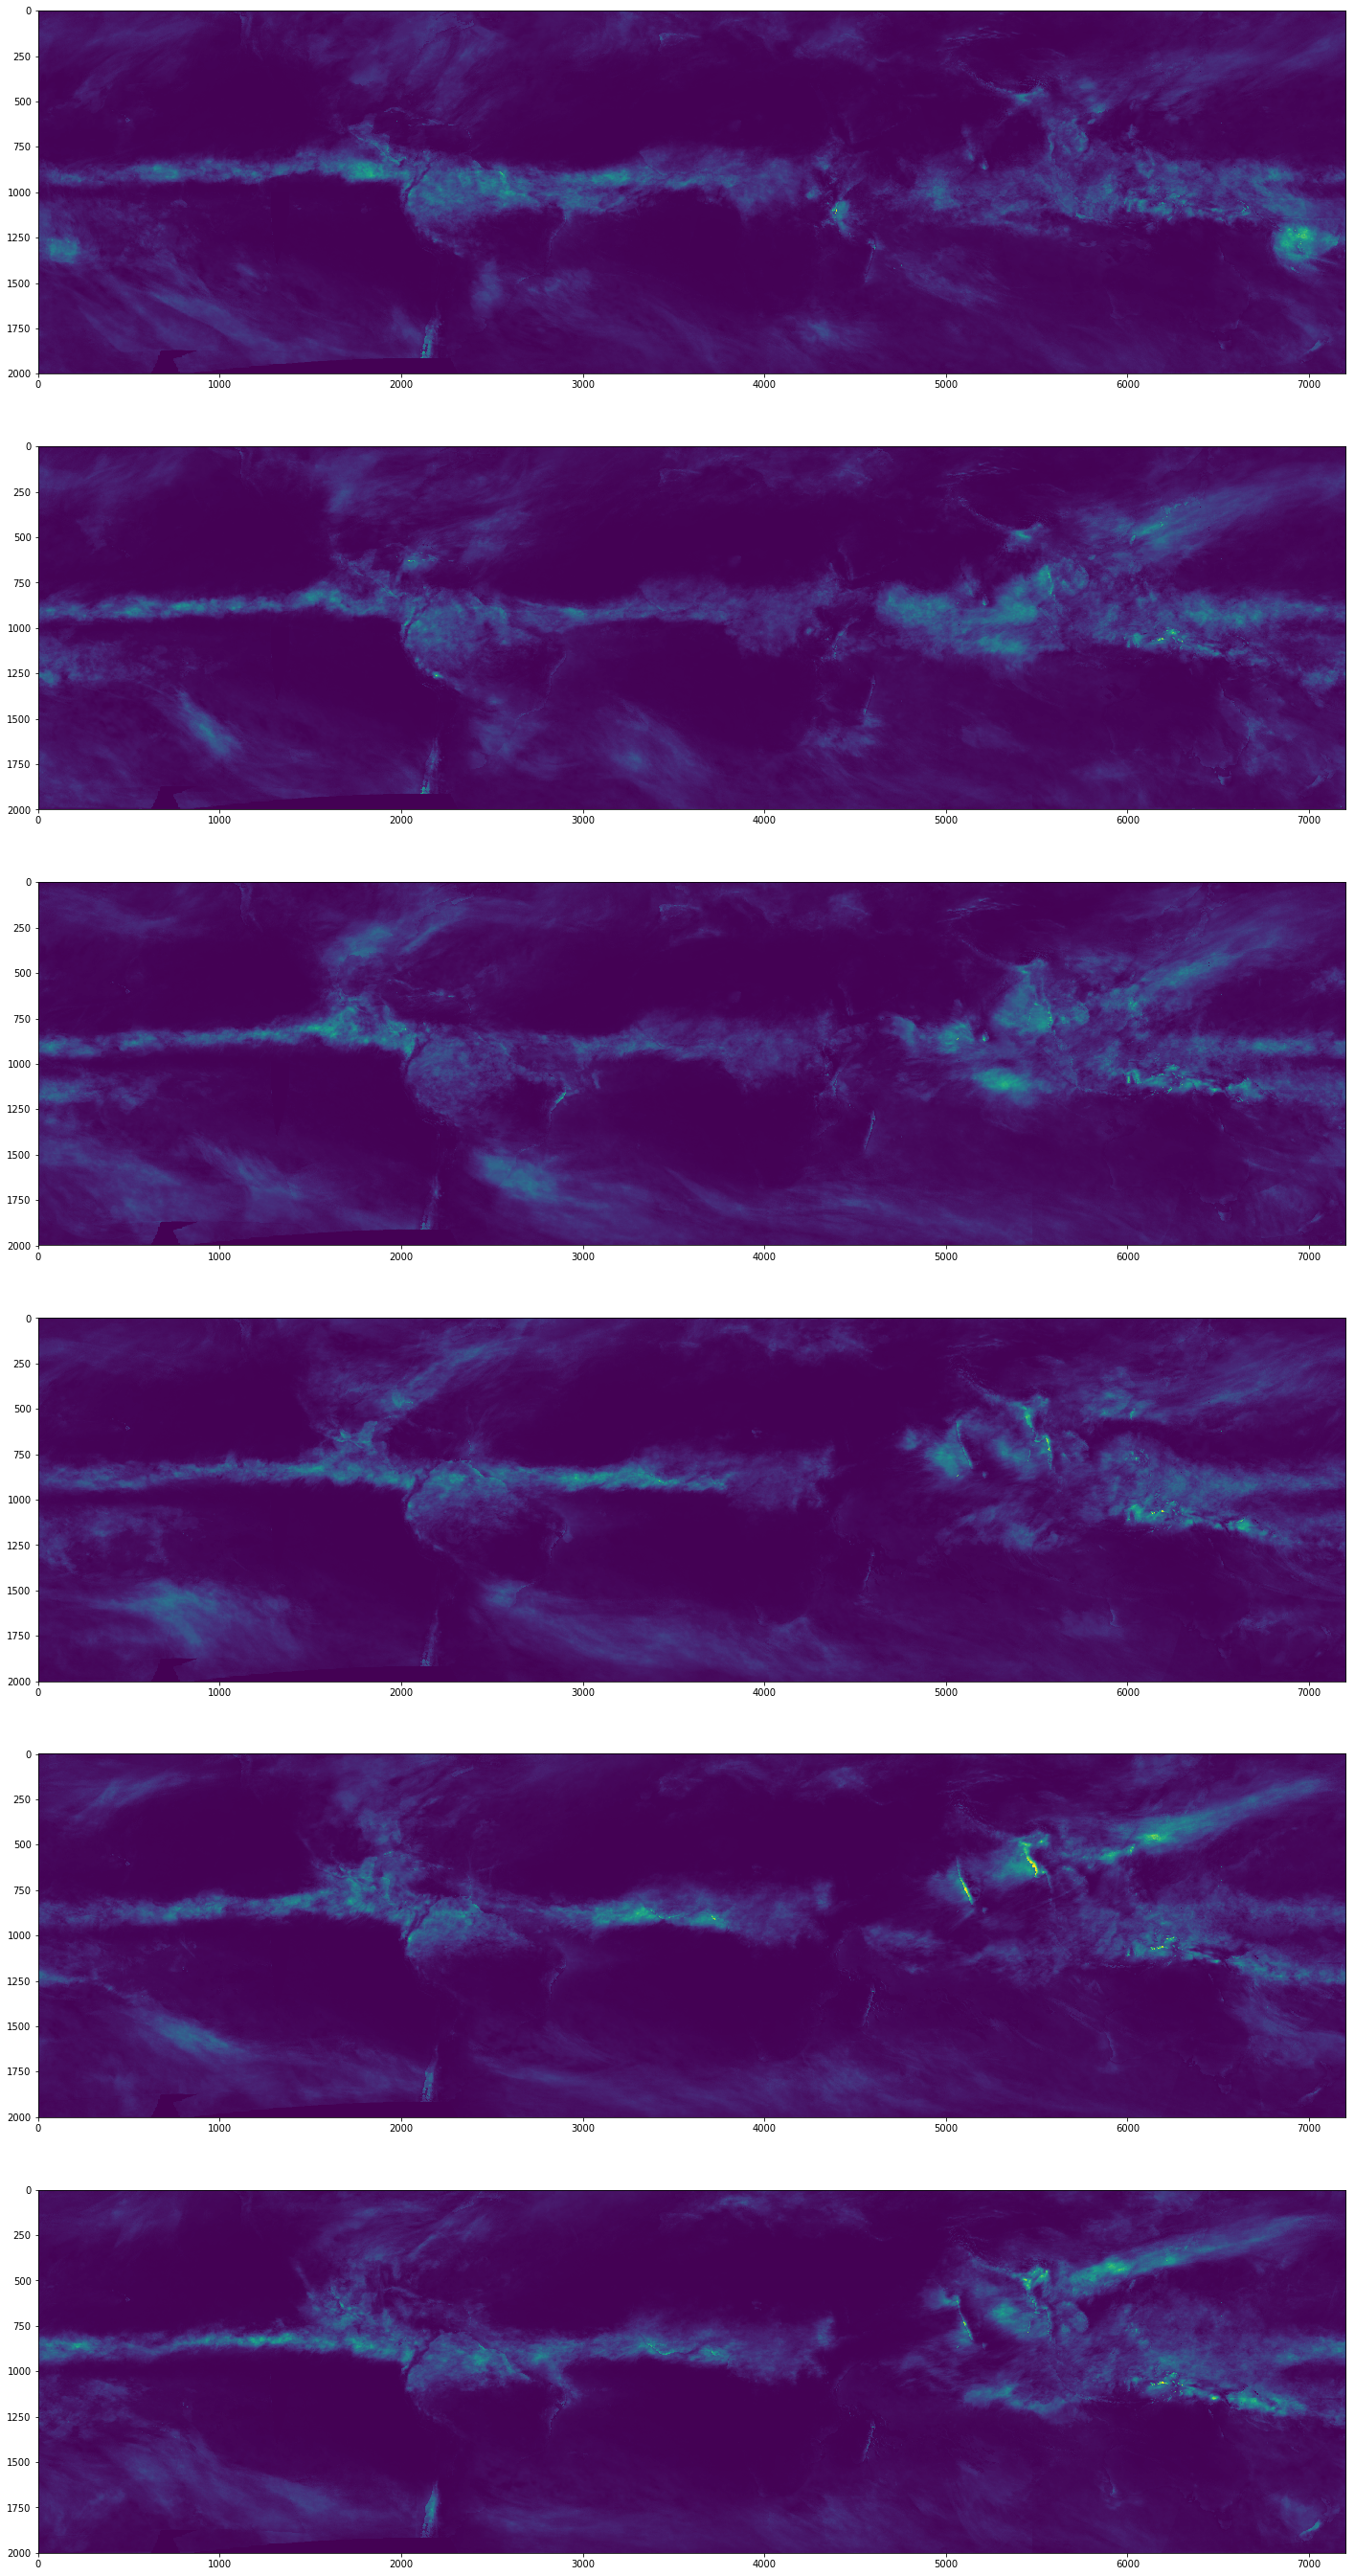

In [5]:
fig = plt.figure(figsize=(300,300))

for i in range(12,18):
    sub = fig.add_subplot(36, 1, i + 1)
    sub.imshow(ras_stack[i,:,:], interpolation='nearest')

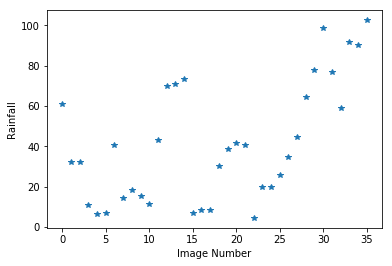

In [6]:
plt.plot(ras_stack[:,1999,7199], '*')
plt.xlabel('Image Number')
plt.ylabel('Rainfall')
plt.show()